[View in Colaboratory](https://colab.research.google.com/github/vmanju/pytorch/blob/master/Intro_to_DL_for_NLP_Module_1_Workbook.ipynb)

# Introduction to Deep Learning for Natural Language Processing
## Notebook 1: The Basics

This notebook provides a general introduction to natural language processing (NLP) and deep learning in PyTorch.

In order to save changes to the notebook, you will need to save a separate copy that you own. Click **File > Save a copy in Drive...** or choose one of the other saving options that allows you to make a copy of this notebook.

Code sections of the notebook appear in grey cells. To run the code in a cell, hover over the brackets in the upper left corner of the cell and click the play button or **Shift+Enter**. You can edit the code in any cell.

When you have completed the lab, return to Trailhead to enter your answers to the exercises in the quiz section and get points.

Feel free to contact Bryan McCann (bmccann@salesforce.com) with any questions or to report issues.

## PyTorch

### Installing PyTorch and Lab dependencies

Make sure to run this cell in order to get the dependencies for this part of the lab. 

In [3]:
import matplotlib.pyplot as plt
from random import shuffle
import collections
import numpy as np

!pip3 install http://download.pytorch.org/whl/cu80/torch-0.4.0-cp36-cp36m-linux_x86_64.whl
import torch
import torch.nn as nn
import torch.nn.functional as F

def println(*x):
  print(*x)
  print()
  
TODO = "Not Yet Implemented"

    100% |████████████████████████████████| 484.0MB 108.3MB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5c502000 @  0x7f43bf3342a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070



### Tensors

PyTorch makes widespread use of Tensor objects. There are two ways to create Tensors in PyTorch. The first way is to create a (possibly nested) list of numerical values.

In [2]:
println("1-dimensional tensors can be created from nested lists of depth 1")
one_d_tensor = torch.tensor([1, 2, 3])
println(one_d_tensor) 

1-dimensional tensors can be created from nested lists of depth 1

tensor([ 1,  2,  3])



In [3]:
println("2-dimensional tensors can be created from nested lists of depth 2")
two_d_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
println(two_d_tensor)

2-dimensional tensors can be created from nested lists of depth 2

tensor([[ 1,  2,  3],
        [ 4,  5,  6]])



In [4]:
println("3-dimensional tensors can be created from nested lists of depth 3")
three_d_tensor = torch.tensor([[[1.1, 2.2, 3.3], [4.4, 5.5, 6.6]], [[7.7, 8.8, 9.9], [10.1, 11.1, 12.2]]])
println(three_d_tensor)

3-dimensional tensors can be created from nested lists of depth 3

tensor([[[  1.1000,   2.2000,   3.3000],
         [  4.4000,   5.5000,   6.6000]],

        [[  7.7000,   8.8000,   9.9000],
         [ 10.1000,  11.1000,  12.2000]]])



#### Indexing

For those with some background in linear algebra, 1-dimensional tensors correspond to vectors and 2-dimensional tensors correspond to matrices. A 0-dimensional tensor corresponds to a single scalar value.

In [5]:
println("0-dimensional tensor created by indexing into a 2-dimensional Tensor.")
two_d_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
scalar = two_d_tensor[0][0]
println(scalar)

0-dimensional tensor created by indexing into a 2-dimensional Tensor.

tensor(1)



In [6]:
println("0-dimensional tensor created by indexing into a 3-dimensional Tensor.")
three_d_tensor = torch.tensor([[[1.1, 2.2, 3.3], [4.4, 5.5, 6.6]], [[7.7, 8.8, 9.9], [10.1, 11.1, 12.2]]])
scalar = three_d_tensor[0][0][0]
println(scalar)

0-dimensional tensor created by indexing into a 3-dimensional Tensor.

tensor(1.1000)



We can extract lower dimensional tensors from higher dimensional ones.

In [7]:
println("1-dimensional tensor created by indexing into a 2-dimensional Tensor.")
vector = two_d_tensor[0]
println(vector)

1-dimensional tensor created by indexing into a 2-dimensional Tensor.

tensor([ 1,  2,  3])



In [8]:
println("2-dimensional tensor created by indexing into a 3-dimensional Tensor.")
matrix = three_d_tensor[0]
println(matrix)

2-dimensional tensor created by indexing into a 3-dimensional Tensor.

tensor([[ 1.1000,  2.2000,  3.3000],
        [ 4.4000,  5.5000,  6.6000]])



#### Initializing Tensors

Pytorch offers a variety of ways to initialize tensors that include all ones, all zeros, in increasing order, amongst [others](https://pytorch.org/docs/master/torch.html?highlight=randn#creation-ops). Below are examples of randomly initializing a tensor, initializing with a sequence of numerical values, and then taking the same sequence of values but 'viewing' them in a different way. This latter idea of 'viewing' or reshaping the tensor will be sprinkled throughout PyTorch code. 

In [4]:
println("Randomly initialize a 3d tensor of size (1, 2, 3)")
randomly_initialized_tensor = torch.randn(1, 2, 3)
println(randomly_initialized_tensor)

Randomly initialize a 3d tensor of size (1, 2, 3)

tensor([[[-0.0915,  1.4838, -1.0779],
         [ 0.1576,  0.2345, -2.0580]]])



In [5]:
println("Initialize to a sequence of ten numbers")
range_tensor = torch.arange(start=0, end=10, step=1)
println(range_tensor)
print(range_tensor.size())

Initialize to a sequence of ten numbers

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

torch.Size([10])


In [6]:
println("Zero all entries in a tensor")
print(range_tensor.zero_())

Zero all entries in a tensor

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])


In [7]:
println("Fill with a particular value")
print(range_tensor.fill_(1))

Fill with a particular value

tensor([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])


##### Exercise 1

In [20]:
# Set the seed for the random number to 123 generator for consistent, reproducible results
torch.manual_seed(123)

println("Randomly initialize a 3d tensor of size (2,3,4)")
randomly_initialized_tensor = torch.randn(2, 3, 4)
println(randomly_initialized_tensor)

println("What is the entry of randomly_initialized_tensor indexed by (0, 2, 3)?")
print('Answer to Exercise 1: ', randomly_initialized_tensor[0][2][3])

Randomly initialize a 3d tensor of size (2,3,4)

tensor([[[ 0.3374, -0.1778, -0.3035, -0.5880],
         [ 0.3486,  0.6603, -0.2196, -0.3792],
         [-0.1606, -0.4015,  0.6957, -1.8061]],

        [[ 1.8960, -0.1750,  1.3689, -1.6033],
         [-0.7849, -1.4096, -0.4076,  0.7953],
         [ 0.9985,  0.2212,  1.8319, -0.3378]]])

What is the entry of randomly_initialized_tensor indexed by (0, 2, 3)?

Answer to Exercise 1:  tensor(-1.8061)


#### Reshaping and Transposing

In [8]:
println("Initialize to a sequence of ten numbers, but then group them into two groups of five")
range_tensor_reshaped = range_tensor.view((2, 5))
println(range_tensor_reshaped)
print(range_tensor_reshaped.size())

Initialize to a sequence of ten numbers, but then group them into two groups of five

tensor([[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]])

torch.Size([2, 5])


In [9]:
println("Transpose a matrix by switching dimension 0 and dimension 1")
range_tensor_reshaped_transposed = range_tensor_reshaped.transpose(0,1)
print(range_tensor_reshaped_transposed)

Transpose a matrix by switching dimension 0 and dimension 1

tensor([[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]])


#### Tensor Operations

PyTorch offers quite a few [operations](https://pytorch.org/docs/master/torch.html?#tensors) for working with Tensors.

In [10]:
A = B = torch.arange(start=0, end=10, step=1).view((2, 5))
println('A:', A)
print('B:', B)

A: tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.]])

B: tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.]])


In [11]:
println('Element-wise addition: A + B')
print(A + B)

Element-wise addition: A + B

tensor([[  0.,   2.,   4.,   6.,   8.],
        [ 10.,  12.,  14.,  16.,  18.]])


In [12]:
println('Element-wise subtraction: A - B')
print(A - B)

Element-wise subtraction: A - B

tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])


In [13]:
println('Element-wise multiplication: A * B')
print(A * B)

Element-wise multiplication: A * B

tensor([[  0.,   1.,   4.,   9.,  16.],
        [ 25.,  36.,  49.,  64.,  81.]])


In [14]:
println('Element-wise division: A / B (notice the nan)')
print(A / B)

Element-wise division: A / B (notice the nan)

tensor([[nan.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.]])


In [15]:
println('Matrix multiplication: A @ B.transpose(0, 1)')
print(A @ B.transpose(0, 1))

Matrix multiplication: A @ B.transpose(0, 1)

tensor([[  30.,   80.],
        [  80.,  255.]])


In [16]:
println('Concatenation along dimension 0: torch.cat([A, B], dim=0)')
print(torch.cat([A, B], dim=0))

Concatenation along dimension 0: torch.cat([A, B], dim=0)

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.]])


In [17]:
println('Concatenation along dimension 1: torch.cat([A, B], dim=1)')
print(torch.cat([A, B], dim=1))

Concatenation along dimension 1: torch.cat([A, B], dim=1)

tensor([[ 0.,  1.,  2.,  3.,  4.,  0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.,  5.,  6.,  7.,  8.,  9.]])


##### Exercises 2-3: Comparison Operations

In [14]:
# Set the seed for the random number generator for consistent,
# reproducible results
torch.manual_seed(123)

# create a randomly initialized tensor using randn (default settings)
# of size (4, 3, 9)
x = torch.randn(4, 3, 9)

println("What is the maximum value of the tensor you created?") 
# (https://pytorch.org/docs/stable/torch.html#comparison-ops)
print('Answer to Exercise 2: ', torch.max(x))


What is the maximum value of the tensor you created?

Answer to Exercise 2:  tensor(2.2473)


In [15]:
# Set the seed for the random number generator for consistent,
# reproducible results
torch.manual_seed(123)

# initialize a tensor to be a sequence of numbers from 0 to 100 
# and reshape it to be of size 2, 25, 2
x = torch.arange(start=0, end=100).reshape(2, 25, 2)

println("What is the max over dimension 1?")
# (https://pytorch.org/docs/stable/torch.html#comparison-ops)
# note that the max over a dimension will return the indices of the maximum
# values as well. We only want the maximum values.
print('Answer to Exercise 3: ', torch.max(x,1)) 

What is the max over dimension 1?

Answer to Exercise 3:  (tensor([[ 48.,  49.],
        [ 98.,  99.]]), tensor([[ 24,  24],
        [ 24,  24]]))


##### Exercsise 4-5: Reduction Operations

In [21]:
# Set the seed for the random number generator for consistent, reproducible results
torch.manual_seed(123)

# create a randomly initialized tensor using randn (default settings)
# of size (5, 8, 7)
x = torch.randn(5, 8, 7)

println("What is the sum of this same tensor?")
# (https://pytorch.org/docs/stable/torch.html#reduction-ops)
print('Answer to Exercise 4: ', torch.sum(x))

What is the sum of this same tensor?

Answer to Exercise 4:  tensor(-17.2386)


In [22]:
# Set the seed for the random number generator for consistent,
# reproducible results
torch.manual_seed(123)

# initialize a tensor to be a sequence of numbers from 0 to 100 
# and reshape it to be of size 2, 25, 2
x = torch.arange(start=0, end=100).reshape(2, 25, 2)

println("What is the sum over dimension 1?")
# (https://pytorch.org/docs/stable/torch.html#comparison-ops)
# note that the max over a dimension will return the indices of the maximum
# values as well. We only want the maximum values.
print('Answer to Exercise 5: ', torch.sum(x,1)) 

What is the sum over dimension 1?

Answer to Exercise 5:  tensor([[  600.,   625.],
        [ 1850.,  1875.]])


### torch.nn.functional
[torch.nn.functional](https://pytorch.org/docs/stable/nn.html#torch-nn-functional) contains a variety of functions that are often used in deep learning.


In [23]:
println("Create a 2d tensor of size (2,2) with 1s along the diagonal and -1s elsewhere.")
A = torch.empty(2,3).fill_(-1) + 2 * torch.eye(2,3)
println(A)

println("tanh(A) maps entries to be between -1 and 1")
println(F.tanh(A))

Create a 2d tensor of size (2,2) with 1s along the diagonal and -1s elsewhere.

tensor([[ 1., -1., -1.],
        [-1.,  1., -1.]])

tanh(A) maps entries to be between -1 and 1

tensor([[ 0.7616, -0.7616, -0.7616],
        [-0.7616,  0.7616, -0.7616]])



In [24]:
println("sigmoid(A)maps entries to be between 0 and 1")
println(F.sigmoid(A))

sigmoid(A)maps entries to be between 0 and 1

tensor([[ 0.7311,  0.2689,  0.2689],
        [ 0.2689,  0.7311,  0.2689]])



In [25]:
println("relu(A) sets negative entries to 0")
println(F.relu(A))


relu(A) sets negative entries to 0

tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.]])



In [26]:
println("softmax(A, dim=1) ensures that the rows of A (dimension 1) sum to 1")
println(F.softmax(A, dim=1)) 

softmax(A, dim=1) ensures that the rows of A (dimension 1) sum to 1

tensor([[ 0.7870,  0.1065,  0.1065],
        [ 0.1065,  0.7870,  0.1065]])



In [27]:
# For input x, matrix A, and vector b, we can compute linear transformations
A = torch.arange(start=1, end=7).reshape(2, 3)
b = torch.tensor([1., 2])
x = torch.tensor([1., 1, 1])
println('A:', A)
println('b:', b)
println('x:', x)

println('Ax\' + b: ', A.matmul(x) + b)
y = F.linear(input=x, weight=A, bias=b)
print('F.linear(x, A, b): ', y)

A: tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]])

b: tensor([ 1.,  2.])

x: tensor([ 1.,  1.,  1.])

Ax' + b:  tensor([  7.,  17.])

F.linear(x, A, b):  tensor([  7.,  17.])


In [28]:
# We can create more complex functions by applying series of linear and non-linear functions
# In this case, we'll take input vectors, 
# apply a random linear transformation that reduces the output to a single number,
# and then we will map that number to be between 0 and 1 using the sigmoid function
def more_complex_function(x):
    assert x.dim() == 1
    A = torch.randn(1, x.size(0))
    b = torch.randn(1)
    return F.sigmoid(F.linear(input=x, weight=A, bias=b))
  
x = torch.tensor([2.,2, 2])
y = more_complex_function(x)
println('x: ', x)
println('y: ', y)

x:  tensor([ 2.,  2.,  2.])

y:  tensor([ 0.2765])



### Deep Learning with PyTorch

In `more_complex_function` above, `A` and `b` are called **parameters**, which is to say that they are values that are set (in this case randomly by us) that affect the final output. `x` is the input, and `y` is the output. 

`more_complex_function` defines how to get the output `y` from the input `x`. In general, we will be concerned with finding  `more_complex_function`s that capture a meaningful relationship between `x` and `y`. Most often 'meaningful' will itself mean that `more_complex_function` can take input `x` and predict the value of `y`.

In this case, `more_complex_function` is not likely to be very useful since the parameters are randomly set each time the function is used. If we did have a certain kind of desired behavior for `more_complex_function`, we could try setting all the parameters by hand. We could add more linear and non-linear transformations and continue to add more parameters that we tweak until the right behavior is found. This would get more difficult with more complex functions, and it is not a sustainable way to find the meaningful relationships we are after. In machine learning, and so in deep learning as well, we will attempt to learn the parameters for these complex functions instead of setting them randomly or by hand.

### torch.nn
[torch.nn](https://pytorch.org/docs/stable/nn.html#torch-nn) contains the most frequently used building blocks, or layers, for deep learning architectures. These layers, or [Modules](https://pytorch.org/docs/stable/nn.html#module) in PyTorch, are wrappers around parameters grouped with linear and non-linear transformations arranged in ways that have proven useful. We can then use these layers to create our own more complex Modules, which are typically neural networks.

In [29]:
class MoreComplexModule(nn.Module): 
  # sub-class nn.Module so that we can register and eventually learn parameters
  
  def __init__(self, input_size, output_size):
      # We have to initialize the module before setting self.linear below 
      # so that it has everything necessary to register the parameters 
      # associated with the new nn.Linear
      super().__init__()
      
      # nn.Linear randomly initializes a set of parameters A 
      # and b (if bias=True) just like we did in more_complex_function above.
      # The difference here is that the nn.Linear module also registers 
      # A and b as nn.Parameters so that they can be learned
      self.linear = nn.Linear(input_size, output_size)
      
  # forward defines the behavior of an 
  # instantiated MoreComplexModule when called
  # This is essentially the same kind of behavior we defined
  # for more_complex_function above, except that A and b can now be learned
  # and are already assigned to self.linear, so we don't need to pass them in
  def forward(self, x):
      return F.sigmoid(self.linear(x))
  
x = torch.tensor([2.,2, 2])
mcm = MoreComplexModule(x.size(0), 1) # MoreComplexModule.__init__
y = mcm(x) # MoreComplexModule.forward
print('y: ', y)

y:  tensor([ 0.3972])


**MoreComplexModule is a neural network!** It is a very shallow, simple neural network, but a neural net nonetheless. Now we need to train it to do something useful.

### Loss Functions and Optimizers
In order to train the parameters of our neural network (A and b in the case of MoreComplexModule), we'll need loss functions and optimizers. The loss function will define how far our neural networks are from the desired behavior by computing the loss, or error, that the network makes when given example inputs used for training. The optimizers will then change the parameters of the neural network with the goal of reducing the loss. Common loss functions can also be found in torch.nn.

#### MSE Loss for Regression

In [30]:
# Mean Squared Error computes the loss by taking the difference between 
# each entry in the tensor output by the neural network and the corresponding
# entry in a tensor that contains the target values.
# This is useful when you want your neural network to predict numerical values.

mse_loss = nn.MSELoss()

output = torch.eye(1, 1) # pretend neural net output
target = torch.eye(1, 1) * 2 
print(output, target)
print(mse_loss(output, target))

# The outputs of the neural network are often called predictions. 

predictions = torch.eye(2, 2)
gold = torch.eye(2, 2) * 2
print(predictions, gold)
print(mse_loss(predictions, gold))

# Target values are synonymous with ground truth or gold values. 
preds = torch.eye(3, 3)
ground_truth = torch.eye(3, 3) * 2
print(preds, ground_truth)
print(mse_loss(preds, ground_truth))

tensor([[ 1.]]) tensor([[ 2.]])
tensor(1.)
tensor([[ 1.,  0.],
        [ 0.,  1.]]) tensor([[ 2.,  0.],
        [ 0.,  2.]])
tensor(0.5000)
tensor([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]]) tensor([[ 2.,  0.,  0.],
        [ 0.,  2.,  0.],
        [ 0.,  0.,  2.]])
tensor(0.3333)


#### NLLLoss for Classification

In [31]:
# In classification problems, we assume that each possible input falls into 
# one of C classes, and we want the neural network to output the correct class.
# In classification, predictions are somtimes called logits or scores
# depending on the loss function and the exact output of the network. 
# Target values are often called labels.

# NLLLoss, Negative Log Likelihood, is useful when your neural network outputs
# probabilities for each of the classes.
nll_loss = nn.NLLLoss()

# some pretend classes
classes = ['classA', 'classB']

# pretend neural net output
# each row is assumed to be associated with one example and
# contains the probabilities for each class in some fixed order
probabilites = torch.tensor([[.2, .8], [.1, .9], [.7, .3]]) 
labels = torch.tensor([classes.index('classA'), 
          classes.index('classB'), 
          classes.index('classA')])
print(probabilites, labels)
# note the .log(); NLLLoss assumes the inputs are log probabilities
print(nll_loss(probabilites.log(), labels)) 

tensor([[ 0.2000,  0.8000],
        [ 0.1000,  0.9000],
        [ 0.7000,  0.3000]]) tensor([ 0,  1,  0])
tensor(0.6905)


#### CrossEntropyLoss for Classification

In [32]:
# CrossEntropyLoss is useful when your neural network outputs
# scores for each of the classes, where the higher the score, the more likely 
# the class. This is by far more common than the case above.
xe_loss = nn.CrossEntropyLoss()

# pretend neural net output
# each row is assumed to be associated with one example and
# contains the scores for each class in some fixed order
scores = torch.tensor([[2., 8], [1, 9], [7, 3]]) 
labels = torch.tensor([classes.index('classA'), 
          classes.index('classB'), 
          classes.index('classA')])
print(scores, labels)
# note the lack of .log(); CrossEntropyLoss calls LogSoftmax() on the scores,
# which first takes the softmax to get logits and then applies a log function
# Applying the softmax, then the log, and using NLLLoss is equivalent to using
# scores with the CrossEntropyLoss.
print(xe_loss(scores, labels)) 

tensor([[ 2.,  8.],
        [ 1.,  9.],
        [ 7.,  3.]]) tensor([ 0,  1,  0])
tensor(2.0070)


Computing the loss won't change your network. You'll need to use an [optimizer](https://pytorch.org/docs/stable/optim.html#how-to-use-an-optimizer) to do that. The most common optimizers in NLP tend to be Stochastic Gradient Descent (SGD) and Adam. We won't dive into the technical details of either, but it is reasonable to try both on any given problem in NLP and choose which one seems to work best for your specific application.

Training a neural network consits of iterating on the following:

1.   Feed an input `x` forward through the network to get output `y`
2.   Use `y` together with the target values to compute a loss
3.   Call [backward](https://pytorch.org/docs/stable/autograd.html) on the loss to compute the direction of the next step
4.    Use the optimizer to take the [step](https://pytorch.org/docs/stable/optim.html#optimizer-step) towards better parameters

For now, all you need to know about 3) is that the backward pass assigns each parameter some responsibility for contributing to the loss. This credit assignment typically uses uses the backpropogation algorithm (backprop) to compute gradients, as in differential calculus. Fortunately, PyTorch implements autodifferentiation, so you (mostly) do not have to worry about how backprop actually works. You just have to remember to call `.backward()` on the loss to compute gradients.

4) uses the credit assignment (gradients) from 3) to update the parameters based on how they contributed to the loss.


#### Linear Regression

In [33]:
torch.manual_seed(123)

# Let's generate some random 2d data points
inputs = torch.randn(20, 2)

# And for this example, we'll try to predict the following function for input x:
def target_generator(x):
    return 2*x[0] + x[1]
targets = torch.tensor([target_generator(i) for i in inputs]).unsqueeze(1)

# Since this is just a linear function, 
# we can use a single linear layer
model = nn.Linear(2, 1)

# We are trying to predict real number values, so we use MSELoss
loss_fn = nn.MSELoss()

# When initializing an optimizer, 
# we have to give it access to the parameters of our model
# When our optimizer takes a step to change our parameters based on the loss,
# backward computes gradients that determine the direction of the step, and
# the learning rate (lr) partially determines
# how big the step should be in that direction.
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

n_epochs = 100 # how many times do we want to look at all of our examples
losses = []
for _ in range(n_epochs):
    optimizer.zero_grad() 
    # the gradients should be zero'd out before each backward; 
    # otherwise they accumulate each time
    preds = model(inputs)
    loss = loss_fn(preds, targets)
    losses.append(loss)
    loss.backward()
    optimizer.step()
print(f'Loss after {n_epochs} epochs: {losses[-1]}')

Loss after 100 epochs: 4.8341597391754476e-08


To verify that our network is learning, we can observe the the loss is decreasing over time.

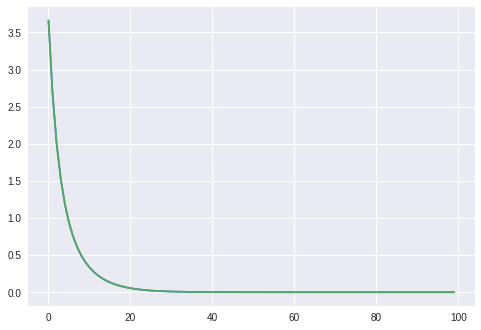

In [34]:
iterations = np.arange(len(losses))
_ = plt.plot(iterations, losses, '', iterations, losses, '-')

As you can see, the loss drops to nearly zero, and it was nearly perfect on all examples after only a single epoch.

#### Data for Exercises 6-7
Here we generate to sets of points and assign one set to be Class A and the other set Class B. In the following exercises, you will implement simple logistic regression and logistic regression with a neural network in order classify these points.


In [35]:
torch.manual_seed(123)

# Generate 2 clusters of 100 2d vectors, each one distributed normally, using
# only two calls of randn()
classApoints = TODO
classBpoints = TODO

# Add the vector [1.0,3.0] to the first cluster and [3.0,1.0] to the second.
classApoints += TODO
classBpoints += TODO

# Concatenate these two clusters along dimension 0 so that the points
# distributed around [1.0, 3.0] all come first
inputs = TODO

# Create a tensor of target values, 0 for points for the first cluster and
# 1 for the points in the second cluster. Make sure that these are LongTensors.
classA = TODO
classB = TODO
targets = torch.cat([classA, classB])

TypeError: ignored

#### Exercise 6: Logistic Regression

For this example, you will implement simple logistic regression for the data created above using a single linear layer.


In [0]:
# Set the random seed to 123 using manual_seed
torch.manual_seed(123)

# Initialize a Linear layer to output scores 
# for each class given the 2d examples
model = TODO

# Define your loss function
loss_fn = TODO

# Initialize an SGD optimizer with learning rate 0.1
optimizer = TODO

# Train the model for 100 epochs 
n_epochs = 100
losses = []
for _ in range(n_epochs):
  optimizer.zero_grad() 
  preds = model(inputs)
  loss = TODO
  losses.append(loss)
  loss.backward()
  optimizer.step()
print(f'Anwswer to Exercise 6: Loss after {n_epochs} epochs: {losses[-1]}')
      
iterations = np.arange(len(losses))
_ = plt.plot(iterations, losses, '', iterations, losses, '-')


#### Exercise 7: Logistic Regression with a Neural Network

In [0]:
# Define a module following these specifications:
# __init__ takes self, in_size, hidden_size, and out_size.
#          defines self.linear_to_hidden to be a linear layer with input
#              size in_size and output size hidden_size
#          defines self.hidden_to_output to be a second linear layer
#              with input size hidden_size and output size out_size
# forward takes self and x as input
#         passes x through linear_to_hidden, then a tanh activation function,
#         and then hidden_to_linear and returns the output
#
# This is is a neural network with 1 hidden layer 
# that contains hidden_size neurons.
class NeuralNet(TODO):
  def __init__(TODO):
    super().__init__()
    self.linear_to_hidden = TODO
    self.hidden_to_output = TODO
    
  def forward(TODO):
    return TODO

# Set the random seed to 123 using manual_seed
TODO

# Initialize your new network to have in_size 2, hidden_size 6, and out_size 2
# so that we can use the same data as in the previous exercise.
model = TODO

# Define your loss function
loss_fn = TODO

# Initialize an SGD optimizer with learning rate 0.3
optimizer = TODO

# Train the model for 100 epochs 
n_epochs = 100
losses = []
for _ in range(n_epochs):
  optimizer.zero_grad() 
  preds = model(inputs)
  loss = TODO
  losses.append(loss)
  loss.backward()
  optimizer.step()
print(f'Answer to Exercise 7: Loss after {n_epochs} epochs: {losses[-1]}')

iterations = np.arange(len(losses))
_ = plt.plot(iterations, losses, '', iterations, losses, '-')

## NLP


There are several standard processes and objects that come up early when working on an NLP problem.

### Tokenization

The first has to do with tokenization of text. The model needs to process sequences of characters as sequences of numbers, so one of the first steps in an NLP project usually deals with how those characters will be chunked up and grouped into tokens. These tokens are the smallest units of text that the model will understand. Tokenization can have a surprising impact on performance for some NLP models, so it is important to be familiar with the tradeoffs of any tokenizer. 

Let's compare four different kinds of tokenization: character-level, which splits everything into individual characters, naive space-based, the [moses tokenization](https://www.nltk.org/_modules/nltk/tokenize/moses.html) common to machine translation, and [spaCy](https://spacy.io/api/tokenizer) tokenization. First, let's install the moses and spaCy tokenizers. This will take 5-10 minutes to load spaCy.

In [1]:
!pip3 install nltk==3.2.5
import nltk
nltk.download('perluniprops')
nltk.download('nonbreaking_prefixes')
import nltk.tokenize.moses as moses

## WARNING: THIS IS GOING TO TAKE A WHILE
!pip3 install spacy
import spacy
spacy.cli.download("en")

[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping corpora/nonbreaking_prefixes.zip.
    100% |████████████████████████████████| 13.9MB 2.7MB/s 
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [36]:
# Consider the following sentence
sentence = "I can't fathom the depths of the deepest neural nets."
println('Example sentence: ', sentence)

# We have plenty of options for how to tokenize such a sentence

# The smaller the chunks, 
# the fewer possible tokens the model has to learn a meaning for. 
# Fewer tokens means more overlap between the kinds of tokens that appear 
# from sentence to sentence, word to word, or document to document. 
# At this extreme, we could handle everything at the character level.
character_tokenization = [c for c in sentence]
println('Character Tokenization: ', character_tokenization)

# But words seem to have natural groupings of characters, 
# and we might want to give our model a natural sense of such word boundaries.
word_tokenization = sentence.split()
println('Space-based Word Tokenization: ', word_tokenization)

# These shorter sequences would be faster to process, 
# and words like "fathom" can be learned as a unit
# But words like "can't" and "can" will still be completely different tokens
# Perhaps we could choose a strategy for separating the contraction out
# so that the model can see it is composed of chunks of text that mean
# 'can' and 'not'

# Enter two common, free tokenizers, which make all sorts of decisions about 
# how tokenization should be done. Compare moses with spacy for example:

moses_tokenizer = moses.MosesTokenizer()
spacy_tokenizer = spacy.load('en')
println('Moses Word Tokenization: ', moses_tokenizer.tokenize(sentence, escape=False))
def spacy_tokenize(s):
  return [t.text for t in spacy_tokenizer(s)]
println('spaCy Word Tokenization: ', spacy_tokenize(sentence))

# Another common tokenizer is CoreNLP, but it takes a little more work to set up
# Regardless of which tokenizer you choose to use, try to get a sense of the 
# decisions you are letting it make for you

Example sentence:  I can't fathom the depths of the deepest neural nets.

Character Tokenization:  ['I', ' ', 'c', 'a', 'n', "'", 't', ' ', 'f', 'a', 't', 'h', 'o', 'm', ' ', 't', 'h', 'e', ' ', 'd', 'e', 'p', 't', 'h', 's', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'd', 'e', 'e', 'p', 'e', 's', 't', ' ', 'n', 'e', 'u', 'r', 'a', 'l', ' ', 'n', 'e', 't', 's', '.']

Space-based Word Tokenization:  ['I', "can't", 'fathom', 'the', 'depths', 'of', 'the', 'deepest', 'neural', 'nets.']

Moses Word Tokenization:  ['I', 'can', "'t", 'fathom', 'the', 'depths', 'of', 'the', 'deepest', 'neural', 'nets', '.']

spaCy Word Tokenization:  ['I', 'ca', "n't", 'fathom', 'the', 'depths', 'of', 'the', 'deepest', 'neural', 'nets', '.']



##### Exercise 8
Which of the four tokenizations demonstrated gives a tokenization that contains "can"?

##### Exercise 9
Which of the four tokenizations demonstrated gives a tokenization that contains "ca"?

##### Exercise 10
Which of the four tokenizations demonstrated gives a tokenization that contains "nets."?

### Vocabularies

Once you have your text tokenized, you'll likely need some kind of vocabulary object to keep track of the
different kinds of tokens and the mapping between tokens and numerical values.

In [0]:
document = "One thing was certain, that the WHITE kitten had had nothing to do with it:--it was the black kitten’s fault entirely. For the white kitten had been having its face washed by the old cat for the last quarter of an hour (and bearing it pretty well, considering); so you see that it COULDN’T have had any hand in the mischief. The way Dinah washed her children’s faces was this: first she held the poor thing down by its ear with one paw, and then with the other paw she rubbed its face all over, the wrong way, beginning at the nose: and just now, as I said, she was hard at work on the white kitten, which was lying quite still and trying to purr--no doubt feeling that it was all meant for its good. But the black kitten had been finished with earlier in the afternoon, and so, while Alice was sitting curled up in a corner of the great arm-chair, half talking to herself and half asleep, the kitten had been having a grand game of romps with the ball of worsted Alice had been trying to wind up, and had been rolling it up and down till it had all come undone again; and there it was, spread over the hearth-rug, all knots and tangles, with the kitten running after its own tail in the middle. ‘Oh, you wicked little thing!’ cried Alice, catching up the kitten, and giving it a little kiss to make it understand that it was in disgrace. ‘Really, Dinah ought to have taught you better manners! You OUGHT, Dinah, you know you ought!’ she added, looking reproachfully at the old cat, and speaking in as cross a voice as she could manage--and then she scrambled back into the arm-chair, taking the kitten and the worsted with her, and began winding up the ball again. But she didn’t get on very fast, as she was talking all the time, sometimes to the kitten, and sometimes to herself. Kitty sat very demurely on her knee, pretending to watch the progress of the winding, and now and then putting out one paw and gently touching the ball, as if it would be glad to help, if it might. ‘Do you know what to-morrow is, Kitty?’ Alice began. ‘You’d have guessed if you’d been up in the window with me--only Dinah was making you tidy, so you couldn’t. I was watching the boys getting in sticks for the bonfire--and it wants plenty of sticks, Kitty! Only it got so cold, and it snowed so, they had to leave off. Never mind, Kitty, we’ll go and see the bonfire to-morrow.’ Here Alice wound two or three turns of the worsted round the kitten’s neck, just to see how it would look: this led to a scramble, in which the ball rolled down upon the floor, and yards and yards of it got unwound again. ‘Do you know, I was so angry, Kitty,’ Alice went on as soon as they were comfortably settled again, ‘when I saw all the mischief you had been doing, I was very nearly opening the window, and putting you out into the snow! And you’d have deserved it, you little mischievous darling! What have you got to say for yourself? Now don’t interrupt me!’ she went on, holding up one finger. ‘I’m going to tell you all your faults. Number one: you squeaked twice while Dinah was washing your face this morning. Now you can’t deny it, Kitty: I heard you! What’s that you say?’ (pretending that the kitten was speaking.) ‘Her paw went into your eye? Well, that’s YOUR fault, for keeping your eyes open--if you’d shut them tight up, it wouldn’t have happened. Now don’t make any more excuses, but listen! Number two: you pulled Snowdrop away by the tail just as I had put down the saucer of milk before her! What, you were thirsty, were you? How do you know she wasn’t thirsty too? Now for number three: you unwound every bit of the worsted while I wasn’t looking! ‘That’s three faults, Kitty, and you’ve not been punished for any of them yet. You know I’m saving up all your punishments for Wednesday week--Suppose they had saved up all MY punishments!’ she went on, talking more to herself than the kitten. ‘What WOULD they do at the end of a year? I should be sent to prison, I suppose, when the day came. Or--let me see--suppose each punishment was to be going without a dinner: then, when the miserable day came, I should have to go without fifty dinners at once! Well, I shouldn’t mind THAT much! I’d far rather go without them than eat them! ‘Do you hear the snow against the window-panes, Kitty? How nice and soft it sounds! Just as if some one was kissing the window all over outside. I wonder if the snow LOVES the trees and fields, that it kisses them so gently? And then it covers them up snug, you know, with a white quilt; and perhaps it says, “Go to sleep, darlings, till the summer comes again.” And when they wake up in the summer, Kitty, they dress themselves all in green, and dance about--whenever the wind blows--oh, that’s very pretty!’ cried Alice, dropping the ball of worsted to clap her hands. ‘And I do so WISH it was true! I’m sure the woods look sleepy in the autumn, when the leaves are getting brown. ‘Kitty, can you play chess? Now, don’t smile, my dear, I’m asking it seriously. Because, when we were playing just now, you watched just as if you understood it: and when I said “Check!” you purred! Well, it WAS a nice check, Kitty, and really I might have won, if it hadn’t been for that nasty Knight, that came wiggling down among my pieces. Kitty, dear, let’s pretend--’ And here I wish I could tell you half the things Alice used to say, beginning with her favourite phrase ‘Let’s pretend.’ She had had quite a long argument with her sister only the day before--all because Alice had begun with ‘Let’s pretend we’re kings and queens;’ and her sister, who liked being very exact, had argued that they couldn’t, because there were only two of them, and Alice had been reduced at last to say, ‘Well, YOU can be one of them then, and I’LL be all the rest.’ And once she had really frightened her old nurse by shouting suddenly in her ear, ‘Nurse! Do let’s pretend that I’m a hungry hyaena, and you’re a bone.’ But this is taking us away from Alice’s speech to the kitten. ‘Let’s pretend that you’re the Red Queen, Kitty! Do you know, I think if you sat up and folded your arms, you’d look exactly like her. Now do try, there’s a dear!’ And Alice got the Red Queen off the table, and set it up before the kitten as a model for it to imitate: however, the thing didn’t succeed, principally, Alice said, because the kitten wouldn’t fold its arms properly. So, to punish it, she held it up to the Looking-glass, that it might see how sulky it was--‘and if you’re not good directly,’ she added, ‘I’ll put you through into Looking-glass House. How would you like THAT?’ ‘Now, if you’ll only attend, Kitty, and not talk so much, I’ll tell you all my ideas about Looking-glass House. First, there’s the room you can see through the glass--that’s just the same as our drawing room, only the things go the other way. I can see all of it when I get upon a chair--all but the bit behind the fireplace. Oh! I do so wish I could see THAT bit! I want so much to know whether they’ve a fire in the winter: you never CAN tell, you know, unless our fire smokes, and then smoke comes up in that room too--but that may be only pretence, just to make it look as if they had a fire. Well then, the books are something like our books, only the words go the wrong way; I know that, because I’ve held up one of our books to the glass, and then they hold up one in the other room. ‘How would you like to live in Looking-glass House, Kitty? I wonder if they’d give you milk in there? Perhaps Looking-glass milk isn’t good to drink--But oh, Kitty! now we come to the passage. You can just see a little PEEP of the passage in Looking-glass House, if you leave the door of our drawing-room wide open: and it’s very like our passage as far as you can see, only you know it may be quite different on beyond. Oh, Kitty! how nice it would be if we could only get through into Looking-glass House! I’m sure it’s got, oh! such beautiful things in it! Let’s pretend there’s a way of getting through into it, somehow, Kitty. Let’s pretend the glass has got all soft like gauze, so that we can get through. Why, it’s turning into a sort of mist now, I declare! It’ll be easy enough to get through--’ She was up on the chimney-piece while she said this, though she hardly knew how she had got there. And certainly the glass WAS beginning to melt away, just like a bright silvery mist. In another moment Alice was through the glass, and had jumped lightly down into the Looking-glass room. The very first thing she did was to look whether there was a fire in the fireplace, and she was quite pleased to find that there was a real one, blazing away as brightly as the one she had left behind. ‘So I shall be as warm here as I was in the old room,’ thought Alice: ‘warmer, in fact, because there’ll be no one here to scold me away from the fire. Oh, what fun it’ll be, when they see me through the glass in here, and can’t get at me!’ Then she began looking about, and noticed that what could be seen from the old room was quite common and uninteresting, but that all the rest was as different as possible. For instance, the pictures on the wall next the fire seemed to be all alive, and the very clock on the chimney-piece (you know you can only see the back of it in the Looking-glass) had got the face of a little old man, and grinned at her. ‘They don’t keep this room so tidy as the other,’ Alice thought to herself, as she noticed several of the chessmen down in the hearth among the cinders: but in another moment, with a little ‘Oh!’ of surprise, she was down on her hands and knees watching them. The chessmen were walking about, two and two! ‘Here are the Red King and the Red Queen,’ Alice said (in a whisper, for fear of frightening them), ‘and there are the White King and the White Queen sitting on the edge of the shovel--and here are two castles walking arm in arm--I don’t think they can hear me,’ she went on, as she put her head closer down, ‘and I’m nearly sure they can’t see me. I feel somehow as if I were invisible--’ Here something began squeaking on the table behind Alice, and made her turn her head just in time to see one of the White Pawns roll over and begin kicking: she watched it with great curiosity to see what would happen next. ‘It is the voice of my child!’ the White Queen cried out as she rushed past the King, so violently that she knocked him over among the cinders. ‘My precious Lily! My imperial kitten!’ and she began scrambling wildly up the side of the fender. ‘Imperial fiddlestick!’ said the King, rubbing his nose, which had been hurt by the fall. He had a right to be a LITTLE annoyed with the Queen, for he was covered with ashes from head to foot. Alice was very anxious to be of use, and, as the poor little Lily was nearly screaming herself into a fit, she hastily picked up the Queen and set her on the table by the side of her noisy little daughter. The Queen gasped, and sat down: the rapid journey through the air had quite taken away her breath and for a minute or two she could do nothing but hug the little Lily in silence. As soon as she had recovered her breath a little, she called out to the White King, who was sitting sulkily among the ashes, ‘Mind the volcano!’ ‘What volcano?’ said the King, looking up anxiously into the fire, as if he thought that was the most likely place to find one. ‘Blew--me--up,’ panted the Queen, who was still a little out of breath. ‘Mind you come up--the regular way--don’t get blown up!’ Alice watched the White King as he slowly struggled up from bar to bar, till at last she said, ‘Why, you’ll be hours and hours getting to the table, at that rate. I’d far better help you, hadn’t I?’ But the King took no notice of the question: it was quite clear that he could neither hear her nor see her. So Alice picked him up very gently, and lifted him across more slowly than she had lifted the Queen, that she mightn’t take his breath away: but, before she put him on the table, she thought she might as well dust him a little, he was so covered with ashes. She said afterwards that she had never seen in all her life such a face as the King made, when he found himself held in the air by an invisible hand, and being dusted: he was far too much astonished to cry out, but his eyes and his mouth went on getting larger and larger, and rounder and rounder, till her hand shook so with laughing that she nearly let him drop upon the floor. ‘Oh! PLEASE don’t make such faces, my dear!’ she cried out, quite forgetting that the King couldn’t hear her. ‘You make me laugh so that I can hardly hold you! And don’t keep your mouth so wide open! All the ashes will get into it--there, now I think you’re tidy enough!’ she added, as she smoothed his hair, and set him upon the table near the Queen. The King immediately fell flat on his back, and lay perfectly still: and Alice was a little alarmed at what she had done, and went round the room to see if she could find any water to throw over him. However, she could find nothing but a bottle of ink, and when she got back with it she found he had recovered, and he and the Queen were talking together in a frightened whisper--so low, that Alice could hardly hear what they said. The King was saying, ‘I assure, you my dear, I turned cold to the very ends of my whiskers!’ To which the Queen replied, ‘You haven’t got any whiskers.’ ‘The horror of that moment,’ the King went on, ‘I shall never, NEVER forget!’ ‘You will, though,’ the Queen said, ‘if you don’t make a memorandum of it.’ Alice looked on with great interest as the King took an enormous memorandum-book out of his pocket, and began writing. A sudden thought struck her, and she took hold of the end of the pencil, which came some way over his shoulder, and began writing for him. The poor King looked puzzled and unhappy, and struggled with the pencil for some time without saying anything; but Alice was too strong for him, and at last he panted out, ‘My dear! I really MUST get a thinner pencil. I can’t manage this one a bit; it writes all manner of things that I don’t intend--’ ‘What manner of things?’ said the Queen, looking over the book (in which Alice had put ‘THE WHITE KNIGHT IS SLIDING DOWN THE POKER. HE BALANCES VERY BADLY’) ‘That’s not a memorandum of YOUR feelings!’ There was a book lying near Alice on the table, and while she sat watching the White King (for she was still a little anxious about him, and had the ink all ready to throw over him, in case he fainted again), she turned over the leaves, to find some part that she could read, ‘--for it’s all in some language I don’t know,’ she said to herself. It was like this."

In [0]:
# The simplest vocabulary will likely need to keep track of all the tokens,
# but it is generally a good idea to keep track of how frequent each token is
# and then keep the vocabulary ordered. Here we order first by word, then by 
# frequency, but any ordering that guranatees that anyone creating the 
# vocabulary from the same dataset would get exactly 
# the same order will work
tokens_with_counts = collections.Counter(spacy_tokenize(document))
tokens_with_counts = sorted(tokens_with_counts.items(), key=lambda tup: tup[0])
tokens_with_counts.sort(key=lambda tup: tup[1], reverse=True)
print(tokens_with_counts)

# If our vocabulary is too big, we might want to prune off some of the rare
# words, often those that occur fewer than 4 times, but we have only the one
# document for now, so let's keep word with more than 1 occurrence
print(len(tokens_with_counts))
tokens_with_counts_pruned = [t for t in tokens_with_counts if t[1] > 1]
print(len(tokens_with_counts_pruned))

# Now that we have our words in order, we can let this define the mapping 
# we will need between words and indices:
index_to_token = [t[0] for t in tokens_with_counts_pruned]
token_to_index = {t: i for i, t in enumerate(index_to_token)}

# With this we can convert our tokenized document to a sequence of numbers.
# This process of numericalization will be an early step in most NLP pipelines.

Congratulations, you made it through the lab! You have become acquainted with the basics of PyTorch and some of the tools you will need for NLP applications. Don't forget to head back to Trailhead to enter your answers to the exercises in the quiz and get points. 